<a href="https://colab.research.google.com/github/khalidkashmirii/sickleaf/blob/main/plant_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#seeding so that same output every time
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
#importing dependencies

import os
import json
from zipfile import ZipFile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


In [ ]:
#data curation
kagle_credentials = json.load(open('kaggle.json'))
os.environ['KAGGLE_USERNAME'] = kagle_credentials['username']
os.environ['KAGGLE_KEY'] = kagle_credentials['key']

In [ ]:
!kaggle datasets download abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 95% 1.94G/2.04G [00:16<00:02, 36.5MB/s]
100% 2.04G/2.04G [00:16<00:00, 131MB/s] 


In [ ]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [ ]:
#unzip
with ZipFile('plantvillage-dataset.zip', 'r') as zip_ref:
   zip_ref.extractall()

preprocessing

In [ ]:
#directory
base_dir = '/content/plantvillage dataset/color'

(256, 256, 3)


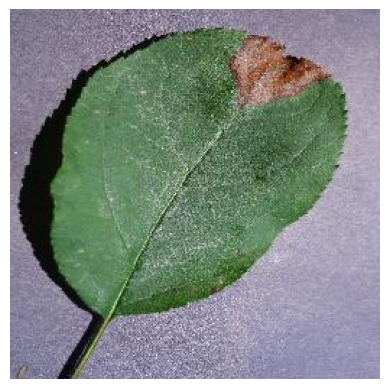

In [ ]:
#reading the image
img_path = '/content/plantvillage dataset/color/Apple___Black_rot/0139bc6d-391c-4fd1-bcae-cc74dabfddd7___JR_FrgE.S 2734.JPG'
img = mping.imread(img_path)
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
#image parameters
img_size = 224
batch_size = 32

train test split

In [ ]:
#image data generator
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
#train generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode = 'categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
#test generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode = 'categorical'
)

Found 10849 images belonging to 38 classes.


cnn

In [ ]:
#model definition
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
 #training the model
 history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
 )

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 97s 67ms/step - accuracy: 0.6012 - loss: 1.7156 - val_accuracy: 0.8176 - val_loss: 0.5884
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 139s 68ms/step - accuracy: 0.9202 - loss: 0.2609 - val_accuracy: 0.8617 - val_loss: 0.4668
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 86s 63ms/step - accuracy: 0.9672 - loss: 0.1029 - val_accuracy: 0.8638 - val_loss: 0.5033
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 88s 64ms/step - accuracy: 0.9778 - loss: 0.0715 - val_accuracy: 0.8495 - val_loss: 0.6312
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 87s 64ms/step - accuracy: 0.9804 - loss: 0.0636 - val_accuracy: 0.8862 - val_loss: 0.5501


In [ ]:
#model evaluation
val_loss, val_accuracy = model.evaluate(validation_generator, steps = validation_generator.samples//batch_size)
print(f'Validation Accuracy: {val_accuracy * 100: .2f}%')

339/339 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - accuracy: 0.8861 - loss: 0.5535
Validation Accuracy:  88.62%


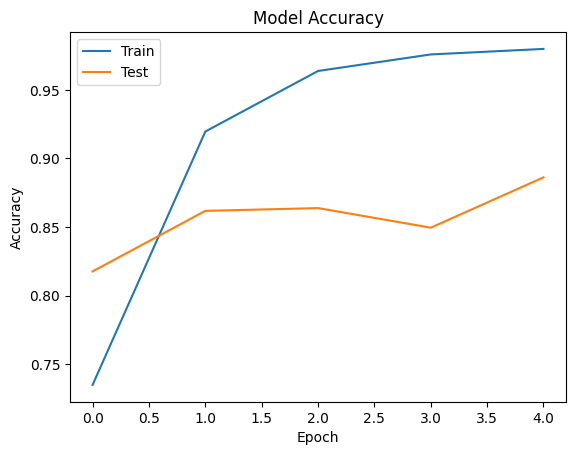

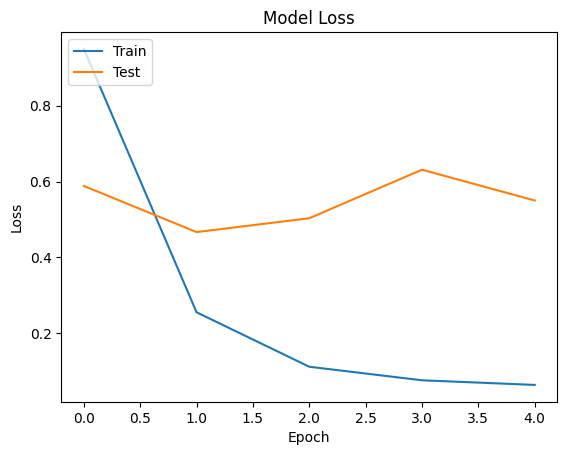

In [ ]:
#plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#plot training and validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#function to load and preprocess the image
def load_and_preprocess_image(image_path, target_size=(224, 224)):
  img = Image.open(image_path)
  img = img.resize(target_size)
  img_array = np.array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = img_array.astype('float32') / 255.0
  return img_array

#function to predict the class of image
def predict_class(model, image_path, class_indices):
  preprocessed_img = load_and_preprocess_image(image_path)
  prediction = model.predict(preprocessed_img)
  predicted_class_index = np.argmax(prediction, axis=1)[0]
  predicted_class_name = class_indices[predicted_class_index]
  return predicted_class_name

In [ ]:
#creating a mapping from class index to name
class_indices = train_generator.class_indices
class_indices = {v: k for k, v in class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
#saving class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
model.save("SickLeaf.h5")